In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Step 2: Load the dataset
house_data = pd.read_csv("C:/Users/1234/Downloads/bangalore house price prediction OHE-data.csv")

In [3]:
# Step 3: Data Preprocessing
# Check for missing values and handle them if needed
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 108 entries, bath to location_Tumkur Road
dtypes: float64(5), int64(103)
memory usage: 5.9 MB


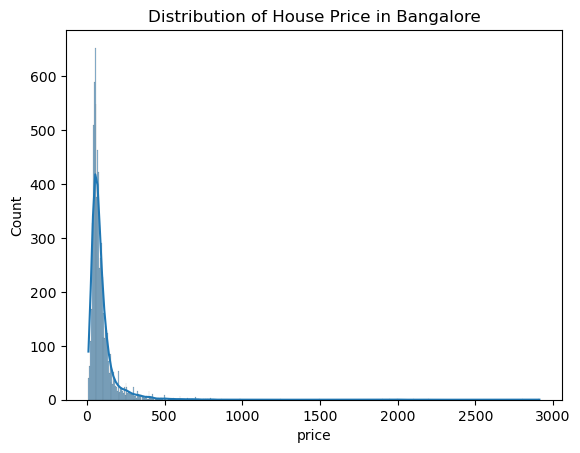

In [5]:
# Step 4: Exploratory Data Analysis (EDA)
# Visualize the distribution of the target variable (house price)
sns.histplot(house_data['price'], kde=True)
plt.title('Distribution of House Price in Bangalore')
plt.show()

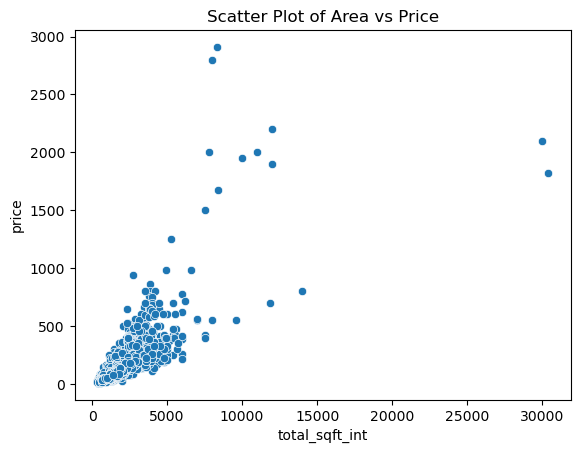

In [6]:
# Visualize the relationship between numerical features and the target variable
sns.scatterplot(x='total_sqft_int', y='price', data=house_data)
plt.title('Scatter Plot of Area vs Price')
plt.show()

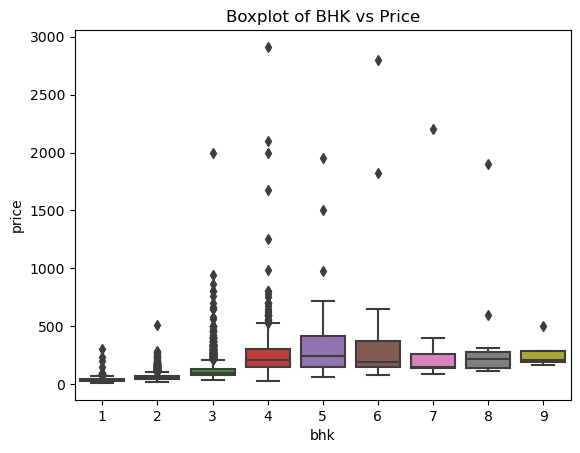

In [7]:
# Visualize the relationship between categorical features and the target variable
sns.boxplot(x='bhk', y='price', data=house_data)
plt.title('Boxplot of BHK vs Price')
plt.show()

In [8]:
# Step 5: Feature Engineering
# Extract features and target variable
X = house_data[['total_sqft_int', 'bhk', 'location_Whitefield',
'location_Sarjapur  Road',
'location_Electronic City',
'location_Marathahalli',
'location_Raja Rajeshwari Nagar',
'location_Haralur Road',
'location_Hennur Road',
'location_Bannerghatta Road',
'location_Uttarahalli',
'location_Thanisandra',
'location_Electronic City Phase II',
'location_Hebbal',
'location_7th Phase JP Nagar',
'location_Yelahanka',
'location_Kanakpura Road',
'location_KR Puram',
'location_Sarjapur',
'location_Rajaji Nagar',
'location_Kasavanhalli',
'location_Bellandur',
'location_Begur Road',
'location_Banashankari',
'location_Kothanur',
'location_Hormavu',
'location_Harlur',
'location_Akshaya Nagar',
'location_Jakkur',
'location_Electronics City Phase 1',
'location_Varthur',
'location_Chandapura',
'location_HSR Layout',
'location_Hennur',
'location_Ramamurthy Nagar',
'location_Ramagondanahalli',
'location_Kaggadasapura',
'location_Kundalahalli',
'location_Koramangala',
'location_Hulimavu',
'location_Budigere',
'location_Hoodi',
'location_Malleshwaram',
'location_Hegde Nagar',
'location_8th Phase JP Nagar',
'location_Gottigere',
'location_JP Nagar',
'location_Yeshwanthpur',
'location_Channasandra',
'location_Bisuvanahalli',
'location_Vittasandra',
'location_Indira Nagar',
'location_Vijayanagar',
'location_Kengeri',
'location_Brookefield',
'location_Sahakara Nagar',
'location_Hosa Road',
'location_Old Airport Road',
'location_Bommasandra',
'location_Balagere',
'location_Green Glen Layout',
'location_Old Madras Road',
'location_Rachenahalli',
'location_Panathur',
'location_Kudlu Gate',
'location_Thigalarapalya',
'location_Ambedkar Nagar',
'location_Jigani',
'location_Yelahanka New Town',
'location_Talaghattapura',
'location_Mysore Road',
'location_Kadugodi',
'location_Frazer Town',
'location_Dodda Nekkundi',
'location_Devanahalli',
'location_Kanakapura',
'location_Attibele',
'location_Anekal',
'location_Lakshminarayana Pura',
'location_Nagarbhavi',
'location_Ananth Nagar',
'location_5th Phase JP Nagar',
'location_TC Palaya',
'location_CV Raman Nagar',
'location_Kengeri Satellite Town',
'location_Kudlu',
'location_Jalahalli',
'location_Subramanyapura',
'location_Bhoganhalli',
'location_Doddathoguru',
'location_Kalena Agrahara',
'location_Horamavu Agara',
'location_Vidyaranyapura',
'location_BTM 2nd Stage',
'location_Hebbal Kempapura',
'location_Hosur Road',
'location_Horamavu Banaswadi',
'location_Domlur',
'location_Mahadevpura',
'location_Tumkur Road']]
y = house_data['price']

In [9]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['location_Whitefield',
'location_Sarjapur  Road',
'location_Electronic City',
'location_Marathahalli',
'location_Raja Rajeshwari Nagar',
'location_Haralur Road',
'location_Hennur Road',
'location_Bannerghatta Road',
'location_Uttarahalli',
'location_Thanisandra',
'location_Electronic City Phase II',
'location_Hebbal',
'location_7th Phase JP Nagar',
'location_Yelahanka',
'location_Kanakpura Road',
'location_KR Puram',
'location_Sarjapur',
'location_Rajaji Nagar',
'location_Kasavanhalli',
'location_Bellandur',
'location_Begur Road',
'location_Banashankari',
'location_Kothanur',
'location_Hormavu',
'location_Harlur',
'location_Akshaya Nagar',
'location_Jakkur',
'location_Electronics City Phase 1',
'location_Varthur',
'location_Chandapura',
'location_HSR Layout',
'location_Hennur',
'location_Ramamurthy Nagar',
'location_Ramagondanahalli',
'location_Kaggadasapura',
'location_Kundalahalli',
'location_Koramangala',
'location_Hulimavu',
'location_Budigere',
'location_Hoodi',
'location_Malleshwaram',
'location_Hegde Nagar',
'location_8th Phase JP Nagar',
'location_Gottigere',
'location_JP Nagar',
'location_Yeshwanthpur',
'location_Channasandra',
'location_Bisuvanahalli',
'location_Vittasandra',
'location_Indira Nagar',
'location_Vijayanagar',
'location_Kengeri',
'location_Brookefield',
'location_Sahakara Nagar',
'location_Hosa Road',
'location_Old Airport Road',
'location_Bommasandra',
'location_Balagere',
'location_Green Glen Layout',
'location_Old Madras Road',
'location_Rachenahalli',
'location_Panathur',
'location_Kudlu Gate',
'location_Thigalarapalya',
'location_Ambedkar Nagar',
'location_Jigani',
'location_Yelahanka New Town',
'location_Talaghattapura',
'location_Mysore Road',
'location_Kadugodi',
'location_Frazer Town',
'location_Dodda Nekkundi',
'location_Devanahalli',
'location_Kanakapura',
'location_Attibele',
'location_Anekal',
'location_Lakshminarayana Pura',
'location_Nagarbhavi',
'location_Ananth Nagar',
'location_5th Phase JP Nagar',
'location_TC Palaya',
'location_CV Raman Nagar',
'location_Kengeri Satellite Town',
'location_Kudlu',
'location_Jalahalli',
'location_Subramanyapura',
'location_Bhoganhalli',
'location_Doddathoguru',
'location_Kalena Agrahara',
'location_Horamavu Agara',
'location_Vidyaranyapura',
'location_BTM 2nd Stage',
'location_Hebbal Kempapura',
'location_Hosur Road',
'location_Horamavu Banaswadi',
'location_Domlur',
'location_Mahadevpura',
'location_Tumkur Road'], drop_first=True)

In [10]:
# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 7: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Step 8: Model Training using KNN Regressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [13]:
# Step 9: Model Evaluation
y_pred = knn.predict(X_test)
y_pred

array([ 53.33333333, 101.        ,  69.33333333, ...,  57.88333333,
        34.66666667,  49.33333333])

In [14]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
# Step 10: Insights and Inference
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 3773.719558575218
R-squared Score: 0.6676059354402573


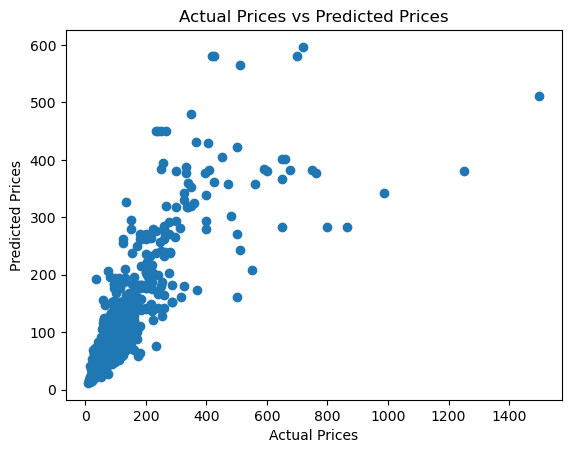

In [16]:
# Step 11: Additional Analysis
# Visualize the predicted vs actual prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [17]:
from sklearn.metrics import r2_score

In [19]:
dd  = pd.DataFrame(y_pred, columns = ['Predicted'])

In [20]:
dd['Actual'] = y_test.values

In [21]:
print("The Strength of the Model is - ",r2_score(dd['Actual'], dd['Predicted']))   #### # Strendth of the Model

The Strength of the Model is -  0.6676059354402573
